# Iris Flower Dataset
#### We're going to build on the lab from class using the Iris Flower Dataset<br>
This is a good dataset for your first project because it is so well understood. 
<br>
• Attributes are numeric so you do not have to figure out how to load and handle data.<br>
• It is a classication problem, allowing you to practice with an easier type of supervised learning algorithm.<br>
• It is a multiclass classification problem (multi-nominal) that may require some specialized handling.<br>
• It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or single sheet of paper).<br>
• All of the numeric attributes are in the same units and the same scale not requiring any special scaling or transforms to get started.

In this tutorial we are going to work through a small machine learning project end-to-end.
Here is an overview of what we are going to cover:
1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

#### Import libraries

In [131]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### COMPLETE CODE IN CELL BELOW

In [132]:
# Load dataset
import pandas as pd
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# TODO: read the csv file
dataset = pd.read_csv(filename)
dataset

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Iris-Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Summarize the Dataset
Now it is time to take a look at the data. In this step we are going to take a look at the data a
few different ways:<br>
• Dimensions of the dataset.<br>
• Peek at the data itself.<br>
• Statistical summary of all attributes.<br>
• Breakdown of the data by the class variable.<br>

#### Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the
data contains with the shape property.
#### COMPLETE CODE IN CELL BELOW

In [133]:
# TODO: print the shape of the dataset 
# This should return 150 instances and 5 attributes for the dataset.
dataset.shape

(150, 5)

#### Peek at the Data
It is also always a good idea to actually eyeball your data.
#### COMPLETE CODE IN CELL BELOW

In [134]:
# TODO: print the first 20 rows of the data
first_20 = dataset.head(20)
print(first_20)

    Sepal-Length  Sepal-Width  Petal-Length  Petal-Width   Iris-Class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

#### Statistical Summary
Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.

#### COMPLETE CODE IN CELL BELOW

In [135]:
#TODO: print descriptions
dataset.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Class Distribution
Let's take a look at the number of instances (rows) that belong to each class. We can view this
as an absolute count.
#### COMPLETE THE CODE BELOW

In [136]:
# print class distribution
dataset['Iris-Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Iris-Class, dtype: int64

#### Data Visualization
We now have a basic idea about the data. We need to extend this with some visualizations. We
are going to look at two types of plots:<br>
• Univariate plots to better understand each attribute.<br>
• Multivariate plots to better understand the relationships between attributes.
#### Univariate Plots
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

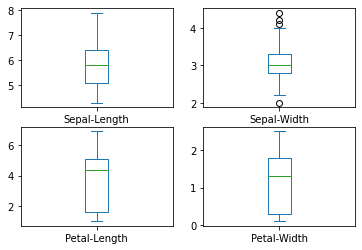

In [137]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

We can also create a histogram of each input variable to get an idea of the distribution.
#### COMPLETE THE CODE BELOW

<AxesSubplot:title={'center':'sepal length'}, ylabel='Frequency'>

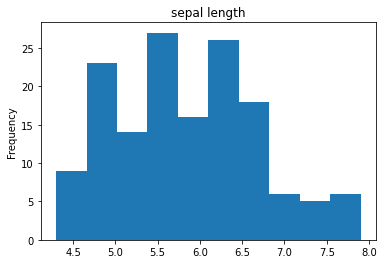

In [138]:
# TODO: create histogram plots of each attribute for the dataset

dataset['Sepal-Length'].plot(kind='hist', title='sepal length')


<AxesSubplot:title={'center':'Sepal Width'}, ylabel='Frequency'>

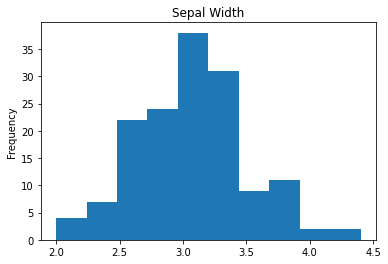

In [139]:
dataset['Sepal-Width'].plot(kind='hist', title='Sepal Width')


<AxesSubplot:title={'center':'Petal Length'}, ylabel='Frequency'>

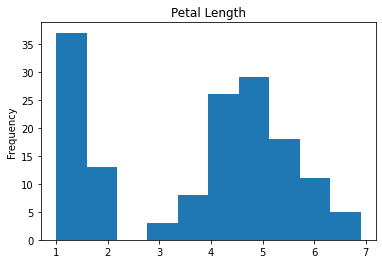

In [140]:
dataset['Petal-Length'].plot(kind='hist', title='Petal Length')


<AxesSubplot:title={'center':'Petal Width'}, ylabel='Frequency'>

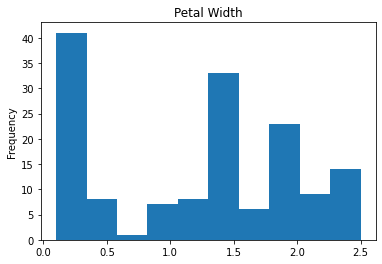

In [141]:
dataset['Petal-Width'].plot(kind='hist', title='Petal Width')


#### Multivariate Plots
Now we can look at the interactions between the variables. Let's look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.
#### COMPLETE THE CODE BELOW

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

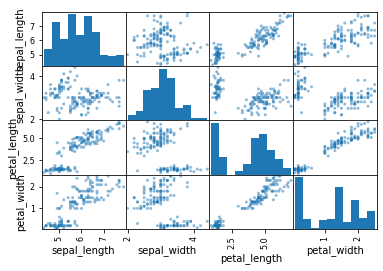

In [142]:
#TODO: create a scatter plot matrix

#Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and
#a predictable relationship.
df = pd.DataFrame(dataset)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class']
pd.plotting.scatter_matrix(df)

### Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 different models to predict species from ower measurements
4. Select the best model.

#### Create a Validation Dataset
We need to know whether or not the model that we created is any good. Later, we will use
statistical methods to estimate the accuracy of the models that we create on unseen data.
We also want a more concrete estimate of the accuracy of the best model on unseen data by
evaluating it on actual unseen data. That is, we are going to hold back some data that the
algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be. We will split the loaded dataset into two, 80%
of which we will use to train our models and 20% that we will hold back as a validation dataset.
#### COMPLETE THE CODE BELOW

In [143]:
# TODO: Split-out validation dataset
# You should have training data in the X train and Y train for preparing models and a
# X validation and Y validation sets that we can use later.

array = dataset.values
X =  dataset[['sepal_length','sepal_width','petal_length','petal_width']]
y =  dataset['class']

validation_size = 10
seed = 7

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: objec

### Test Harness
We will use 10-fold cross-validation to estimate accuracy on unseen data. This will split our
dataset into 10 parts, e.g. the model will train on 9 and test on 1 and repeat for all combinations
of train-test splits. We are using the metric of accuracy to evaluate models. This is a proportion
of the number of correctly predicted instances divided by the total number of instances in the
dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring
variable when we run build and evaluate each model next.

#### Build Models
We don't know which algorithms would be good on this problem or what con gurations to use.
We got an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six different algorithms:<br>
• Logistic Regression (LR).<br>
• Linear Discriminant Analysis (LDA).<br>
• k-Nearest Neighbors (KNN).<br>
• Classification and Regression Trees (CART).<br>
• Gaussian Naive Bayes (NB).<br>
• Support Vector Machines (SVM).<br>
This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms. We reset the random number seed before each run to ensure that
the evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let's build and evaluate our five models:


In [144]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.991667 (0.025000)
KNN: 0.975000 (0.038188)
CART: 0.950000 (0.055277)
NB: 0.975000 (0.038188)
SVM: 0.975000 (0.038188)


#### Select The Best Model
We now have 6 models and accuracy estimations for each. We need to compare the models to
each other and select the most accurate. Running the example above, we get the following raw
results:<br>
LR: 0.958333 (0.055902)<br>
LDA: 0.975000 (0.038188)<br>
KNN: 0.983333 (0.033333)<br>
CART: 0.950000 (0.076376)<br>
NB: 0.966667 (0.040825)<br>
SVM: 0.991667 (0.025000)<br>
We can see that it looks like KNN has the largest estimated accuracy score. We can also
create a plot of the model evaluation results and compare the spread and the mean accuracy
of each model. There is a population of accuracy measures for each algorithm because each
algorithm was evaluated 10 times (10 fold cross-validation).

#### COMPLETE THE CODE BELOW

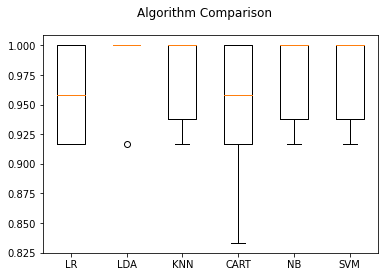

In [145]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Make Predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent  final
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as over fitting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the KNN model directly on the validation
set and summarize the results as a final accuracy score, a confusion matrix and a classification
report.
#### COMPLETE CODE IN CELL BELOW

In [146]:
# TODO:Make predictions on validation dataset
# We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of
# the three errors made. Finally the classification report provides a breakdown of each class by
# precision, recall, f1-score and support showing excellent results (granted the validation dataset
# was small). 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

#TODO: summarize the results by printing a final accuracy score, a confusion matrix 
# and a classification report.
final_score = accuracy_score(y_test,predictions)
print("Accuracy score: " + str(final_score))

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion matrix: ")
print(conf_matrix)

print("Classification report: ")
print(classification_report(y_test,predictions))

Accuracy score: 0.9
Confusion matrix: 
[[11  0  0]
 [ 0  7  1]
 [ 0  2  9]]
Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.90      0.90      0.90        30

